In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [23]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'1.15.0'

In [4]:
import twoModelAnalysis as TWA

In [47]:
# this is the setting for plots for research paper and articles.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
plt.rc('mathtext',**{'default':'regular'})

# Set the style for seaborn 
plt.style.use(['seaborn-white', 'seaborn-paper'])

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'medium',
         'axes.titlesize': 'medium',
         'xtick.labelsize': 'small',
         'ytick.labelsize': 'small'
         }

pylab.rcParams.update(**params)

import seaborn as sns
sns.set_context(rc=params)

def stylize_axes(ax, title):
    # removes the top and right lines from the plot rectangle
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.xaxis.set_tick_params(top=False, direction='out', width=1)
    ax.yaxis.set_tick_params(right=False, direction='out', width=1)
    
    # Enforce the size of the title, label and tick labels
    #ax.set_xlabel(ax.get_xlabel(), fontsize='medium')
    #ax.set_ylabel(ax.get_ylabel(), fontsize='medium')
    
    #ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium')
    #ax.set_xticklabels(fontsize='medium')
   
    ax.set_title(title)
    
def save_image(fig, title):
    if title is not None:
        fig.savefig('../Results/images/'+title+".png", dpi=300, bbox_inches='tight', transparent=True)
        fig.savefig('../Results/images/'+title+".pdf", bbox_inches='tight')

def figure_size(fig, size):
    fig.set_size_inches(size)
    fig.tight_layout()

In [48]:
sns.set(font_scale=1.3, style="whitegrid")

In [49]:
def plot_untargeted_targeted_success_score(source_untar_results, source_tar_results, target_untar_results, 
                                           target_tar_results, fig_name):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 3.5))

    for attack_type in np.unique(source_untar_results['Attack Method'].values):
        # plot the source model values
        y = source_untar_results[source_untar_results['Attack Method'] == attack_type]['Modified Success Score'].values
        p = ax[0].plot(epsilon, y, label = attack_type)
        ax[0].scatter(epsilon, y, c = p[0].get_color())
        
        # Plot the target model values
        y = target_untar_results[target_untar_results['Attack Method'] == attack_type]['Modified Success Score'].values
        p1 = ax[0].plot(epsilon, y, linestyle='--', c = p[0].get_color())
        ax[0].scatter(epsilon, y, marker='*', c = p[0].get_color())


    # put the xticks to the values of epsilon
    ax[0].set_xticks([0.1, 0.25, 0.5, 0.9])

    # put the xlabel and ylabel
    ax[0].set_xlabel("Perturbation Budget ($\epsilon$)")
    ax[0].set_ylabel("Success Score (%)")
    stylize_axes(ax[0], "Untargeted adversarial examples")


    for attack_type in np.unique(source_tar_results['Attack Method'].values):
        # plot the source model values
        y = source_tar_results[source_tar_results['Attack Method'] == attack_type]['Success Score'].values
        p = ax[1].plot(epsilon, y, label = attack_type)
        ax[1].scatter(epsilon, y, c = p[0].get_color())

        # plot the target model values
        y = target_tar_results[target_tar_results['Attack Method'] == attack_type]['Success Score'].values
        p1 = ax[1].plot(epsilon, y, linestyle='--', c = p[0].get_color())
        ax[1].scatter(epsilon, y, marker='*', c = p[0].get_color())


    # put the xticks to the values of epsilon
    ax[1].set_xticks([0.1, 0.25, 0.5, 0.9])

    # put the xlabel and ylabel
    ax[1].set_xlabel("Perturbation Budget ($\epsilon$)")
    # ax[1].set_ylabel("Success Score (%)")
    stylize_axes(ax[1], "Targeted adversarial examples")

    # put the model legend in the top left corner
    legend1 = ax[1].legend([p[0], p1[0]], ["Source", "Target"], loc='upper right', bbox_to_anchor=(1.0, 0.85), 
                         fontsize='medium')
    # ax[0].get_gca().add_artist(legend1)

    # Shrink current axis by 40%
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.99, box.height])

    # Put the attack method legend to the right of the current axis
    ax[0].legend(loc='center left', bbox_to_anchor=(2.2, 0.5), fontsize='medium')

    save_image(fig, fig_name)

In [50]:
images_result_path = "../Results/images/"
data_result_path = "../Results/texts/"

In [28]:
epsilon = [0.1, 0.25, 0.5, 0.9]
min_value = -1.0
max_value = 1.0
n_iterations = 50
target_class = 3

In [29]:
BATCH_SIZE = 32
LEARNING_RATE = 0.001
N_EPOCHS = 100

In [30]:
os.listdir("../Processed data/")

['adl_activity_dataset_small.pickle',
 'adl_activity_dataset_small_minmax_scaled.pickle',
 'adl_activity_data_complete.pickle',
 'adl_activity_feature_dataset_small.pickle',
 'adl_dataset_small_minmax_scaled_feature.pickle',
 'adl_posture_dataset.pickle',
 'adl_posture_dataset_small.pickle',
 'adl_posture_data_complete.pickle',
 'adl_posture_feature_dataset.pickle',
 'adl_posture_feature_dataset_1.pickle',
 'DL_source_dataset.pickle',
 'DL_target_dataset.pickle',
 'mHealth_ankle_dataset.pickle',
 'mHealth_ankle_feature_dataset.pickle',
 'mHealth_chest_dataset.pickle',
 'mHealth_chest_feature_dataset.pickle',
 'mHealth_wrist_dataset.pickle',
 'mHealth_wrist_feature_dataset.pickle',
 'mHealth_wrist_feature_dataset_1.pickle',
 'mHealth_wrist_source_dataset.pickle',
 'mHealth_wrist_target_dataset.pickle',
 'uci_body_acc_dataset.pickle',
 'uci_feature_dataset.pickle',
 'uci_feature_dataset_1.pickle',
 'uci_source_dataset.pickle',
 'uci_target_dataset.pickle']

# DL

In [12]:
dl_two_model = TWA.TwoModel("../Processed data/DL_source_dataset.pickle", 
                       "../Processed data/DL_target_dataset.pickle", [], save_results=True)

Loading Source Dataset
[1 7 6]
X: (9918, 128, 3)
Y: (9918,)
Loading Target Dataset
[2, 3, 4, 5]
X: (6516, 128, 3)
Y: (6516,)


In [13]:
dl_two_model.prepare_for_training(batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE, 
                                   n_epochs=N_EPOCHS)

Source
Training set (6694, 128, 3) 
Test set (2480, 128, 3)
Validation set (744, 128, 3)
Target
Training set (4398, 128, 3) 
Test set (1629, 128, 3)
Validation set (489, 128, 3)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


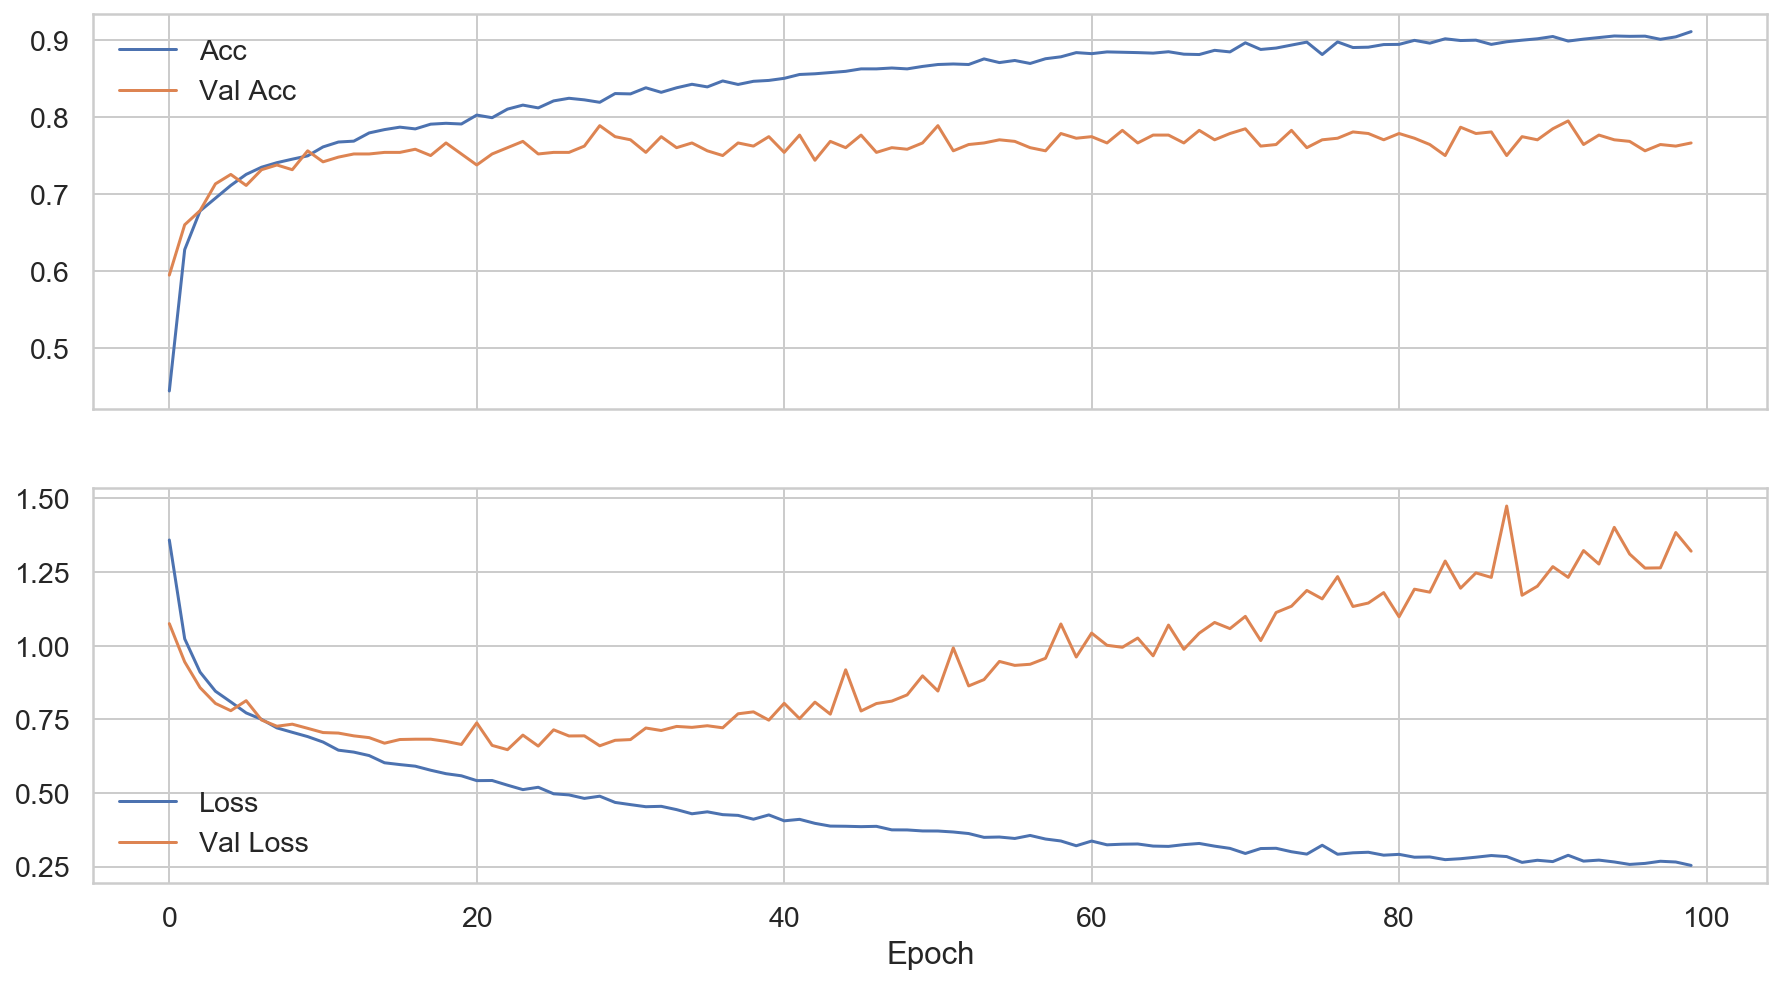

Saving trained source and target models
Source model path: ../Saved Model/dl_source_model
Target model path: ../Saved Model/dl_target_model
Performance of the source model dl_source_model
9918/9918 [==============================] - 1s 125us/sample - loss: 0.6405 - acc: 0.8174
On Source Dataset Loss: 0.640, Accuracy 81.740
6516/6516 [==============================] - 1s 127us/sample - loss: 11.7570 - acc: 0.2528
On Target Dataset Loss: 11.757, Accuracy 25.276
Performance of the target model dl_target_model
9918/9918 [==============================] - 1s 129us/sample - loss: 5.5426 - acc: 0.3408
On Source Dataset Loss: 5.543, Accuracy 34.079
6516/6516 [==============================] - 1s 130us/sample - loss: 0.6368 - acc: 0.8605
On Target Dataset Loss: 0.637, Accuracy 86.050


In [14]:
dl_two_model.train_models("dl_source_model", "dl_target_model")

In [15]:
dl_two_model.adversarial_init(epsilon, min_value, max_value, n_iterations, target_class)

In [16]:
dl_two_model.adversarial_untargeted_attacks("dl_source_untar_results", "dl_target_untar_results")

C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\attacks_tf.py:27: UserWarning: attacks_tf is deprecated and will be removed on 2019-07-18 or after. Code should import functions from their new locations directly.
  warnings.warn("attacks_tf is deprecated and will be removed on 2019-07-18"
[INFO 2020-11-09 08:29:36,913 cleverhans] Constructing new graph for attack FastGradientMethod



Instructions for updating:
Use `tf.cast` instead.




C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001E040DE0678> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "


Instructions for updating:
dim is deprecated, use axis instead


[INFO 2020-11-09 08:29:37,720 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-09 08:29:51,525 cleverhans] Constructing new graph for attack MomentumIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001E040DE0678> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versi

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001E040DE0678> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001E040DE0678> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2480/2480 [==============================] - 0s 58us/sample - loss: 5.7568 - acc: 0.3298


[INFO 2020-11-09 09:03:41,462 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001E040DE0678> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

2480/2480 [==============================] - 0s 58us/sample - loss: 5.7492 - acc: 0.3278


[INFO 2020-11-09 09:34:22,802 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001E040DE0678> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

2480/2480 [==============================] - 0s 54us/sample - loss: 5.7507 - acc: 0.3298


[INFO 2020-11-09 10:02:46,853 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001E040DE0678> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

2480/2480 [==============================] - 0s 54us/sample - loss: 5.7569 - acc: 0.3282
Saving the results of untargeted attacks.
Source model results at ../Results/texts/dl_source_untar_results.csv
Source model results at ../Results/texts/dl_target_untar_results.csv


In [17]:
dl_two_model.adversarial_targeted_attacks("dl_source_tar_results", "dl_target_tar_results")

[INFO 2020-11-09 11:01:12,622 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-09 11:01:13,127 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

2480/2480 [==============================] - 0s 65us/sample - loss: 11.2657 - acc: 0.0944


[INFO 2020-11-09 11:36:46,328 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-09 11:36:46,868 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

2480/2480 [==============================] - 0s 56us/sample - loss: 11.2638 - acc: 0.0911


[INFO 2020-11-09 12:12:35,353 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-09 12:12:35,939 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

2480/2480 [==============================] - 0s 62us/sample - loss: 11.2971 - acc: 0.0903


[INFO 2020-11-09 12:48:38,743 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-09 12:48:39,378 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001E040DDB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

2480/2480 [==============================] - 0s 71us/sample - loss: 11.3175 - acc: 0.0907
Saving the results of targeted attacks.
Source model results at ../Results/texts/dl_source_tar_results.csv
Source model results at ../Results/texts/dl_target_tar_results.csv


In [35]:
dl_source_tar_results = pd.read_csv(data_result_path+"dl_source_tar_results.csv")
dl_target_tar_results = pd.read_csv(data_result_path+"dl_target_tar_results.csv")

In [36]:
dl_source_untar_results = pd.read_csv(data_result_path+"dl_source_untar_results.csv")
dl_target_untar_results = pd.read_csv(data_result_path+"dl_target_untar_results.csv")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

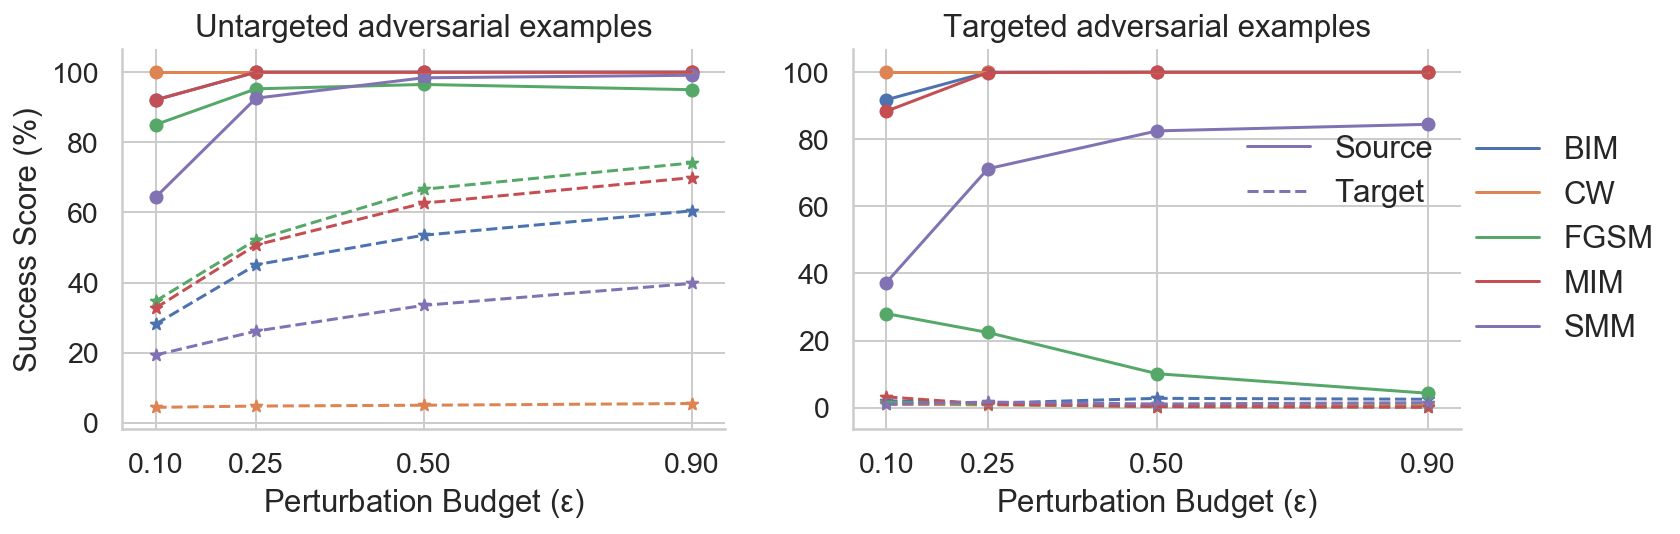

In [51]:
plot_untargeted_targeted_success_score(dl_source_untar_results, dl_source_tar_results,
                                      dl_target_untar_results, dl_target_tar_results, 
                                      "dl_trans_across_subjects")

# UCI

In [11]:
uci_two_model = TWA.TwoModel("../Processed data/uci_source_dataset.pickle", 
                       "../Processed data/uci_target_dataset.pickle", [], save_results=True)

Loading Source Dataset
[25  8 16 12  6  5 26 17  7 27 19 20  9 23  4]
X: (5138, 128, 3)
Y: (5138,)
Loading Target Dataset
[1, 2, 3, 10, 11, 13, 14, 15, 18, 21, 22, 24, 28, 29, 30]
X: (5161, 128, 3)
Y: (5161,)


In [14]:
uci_two_model.prepare_for_training(batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE, 
                                   n_epochs=N_EPOCHS)

Source
Training set (3467, 128, 3) 
Test set (1285, 128, 3)
Validation set (386, 128, 3)
Target
Training set (3483, 128, 3) 
Test set (1291, 128, 3)
Validation set (387, 128, 3)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
uci_two_model.load_models("uci_source_model", "uci_target_model")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


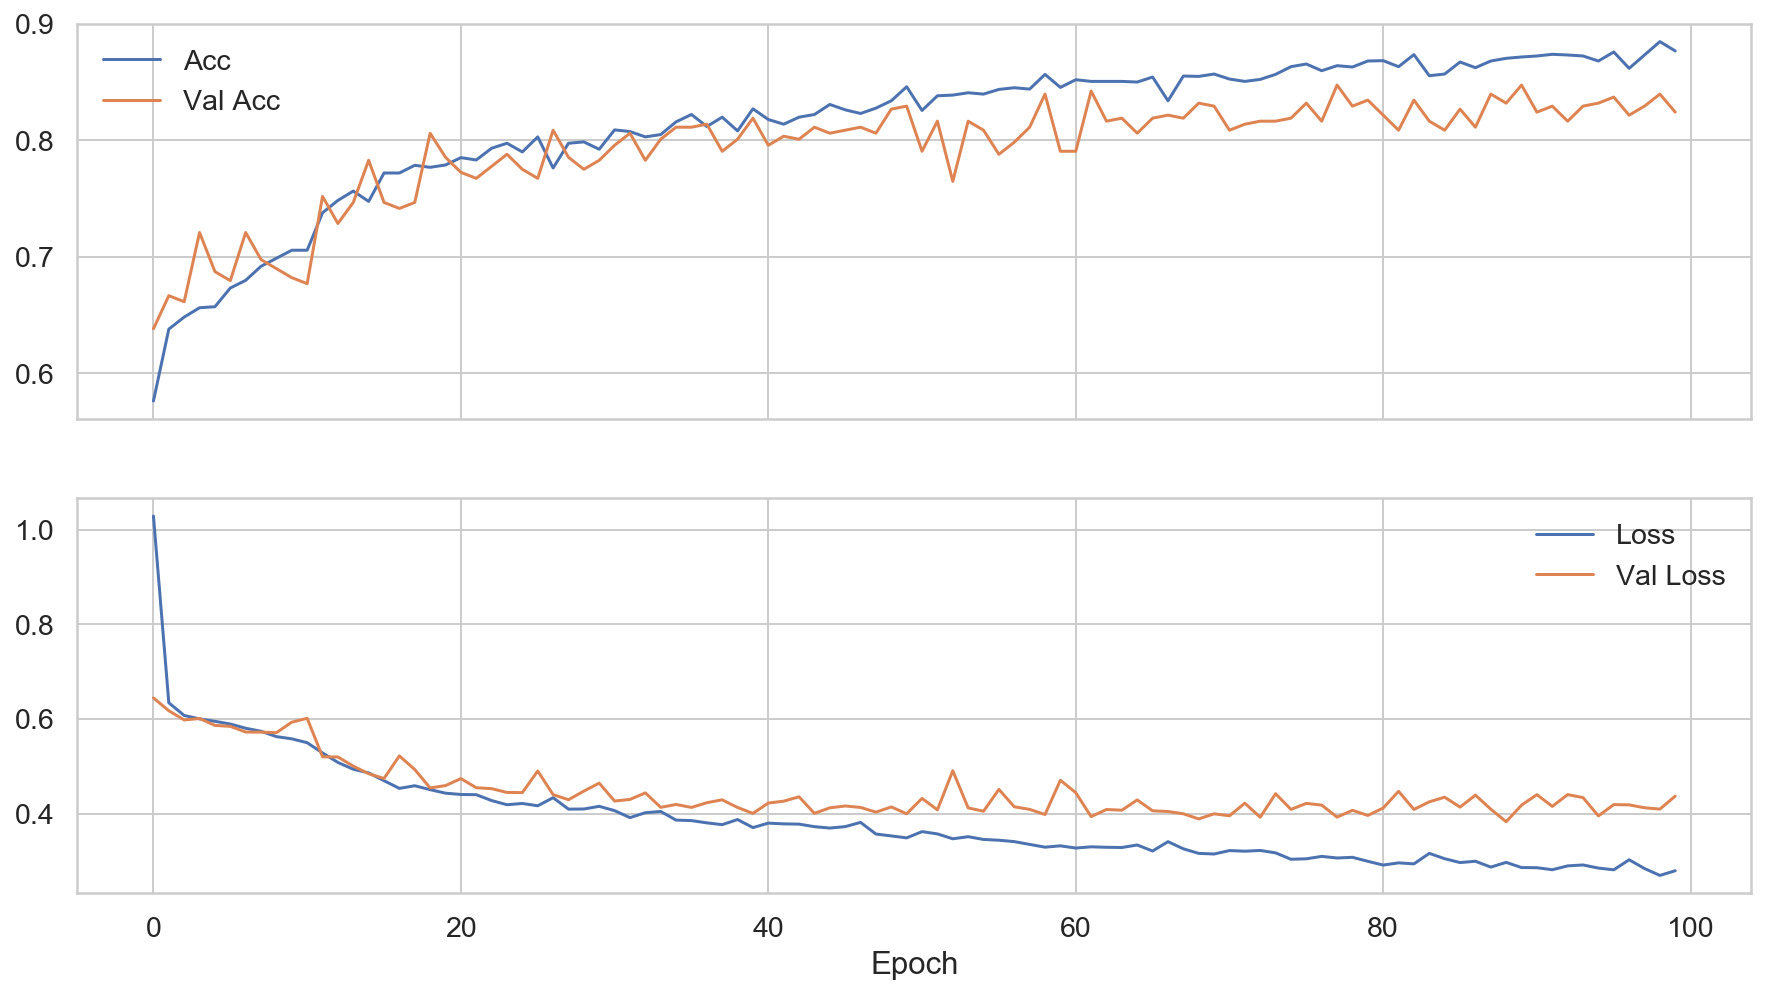

Saving trained source and target models
Source model path: ../Saved Model/uci_source_model
Target model path: ../Saved Model/uci_target_model
Performance of the source model uci_source_model
5138/5138 [==============================] - 1s 161us/sample - loss: 0.4557 - acc: 0.8149
On Source Dataset Loss: 0.456, Accuracy 81.491
5161/5161 [==============================] - 1s 162us/sample - loss: 3.5032 - acc: 0.6142
On Target Dataset Loss: 3.503, Accuracy 61.422
Performance of the target model uci_target_model
5138/5138 [==============================] - 1s 163us/sample - loss: 2.6096 - acc: 0.6244
On Source Dataset Loss: 2.610, Accuracy 62.437
5161/5161 [==============================] - 1s 152us/sample - loss: 0.3267 - acc: 0.8558
On Target Dataset Loss: 0.327, Accuracy 85.584


In [38]:
#uci_two_model.train_models("uci_source_model", "uci_target_model")

In [18]:
uci_two_model.adversarial_init(epsilon, min_value, max_value, n_iterations, target_class)

In [40]:
uci_two_model.adversarial_untargeted_attacks("uci_source_untar_results", "uci_target_untar_results")

[INFO 2020-11-08 17:58:42,964 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001CE4372D828> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1285/1285 [==============================] - 0s 162us/sample - loss: 3.0772 - acc: 0.5767


[INFO 2020-11-08 18:14:23,254 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001CE4372D828> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1285/1285 [==============================] - 0s 182us/sample - loss: 3.0820 - acc: 0.5767


[INFO 2020-11-08 18:30:43,739 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001CE4372D828> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1285/1285 [==============================] - 0s 177us/sample - loss: 3.0916 - acc: 0.5774


[INFO 2020-11-08 18:47:46,330 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001CE4372D828> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1285/1285 [==============================] - 0s 190us/sample - loss: 3.1062 - acc: 0.5751
Saving the results of untargeted attacks.
Source model results at ../Results/texts/uci_source_untar_results.csv
Source model results at ../Results/texts/uci_target_untar_results.csv


In [19]:
uci_two_model.adversarial_targeted_attacks("uci_source_tar_results", "uci_target_tar_results")

C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\attacks_tf.py:27: UserWarning: attacks_tf is deprecated and will be removed on 2019-07-18 or after. Code should import functions from their new locations directly.
  warnings.warn("attacks_tf is deprecated and will be removed on 2019-07-18"
[INFO 2020-11-08 21:15:55,003 cleverhans] Constructing new graph for attack FastGradientMethod





Instructions for updating:
dim is deprecated, use axis instead


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001D9C72EB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-08 21:15:55,403 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001D9C72EB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent

C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001D9C72EB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001D9C72F0678> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1285/1285 [==============================] - 0s 66us/sample - loss: 28.8979 - acc: 0.0062


[INFO 2020-11-08 21:31:46,732 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001D9C72EB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-08 21:31:47,045 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001D9C72EB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1285/1285 [==============================] - 0s 68us/sample - loss: 28.8794 - acc: 0.0062


[INFO 2020-11-08 21:49:29,760 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001D9C72EB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-08 21:49:30,131 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001D9C72EB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1285/1285 [==============================] - 0s 69us/sample - loss: 28.8098 - acc: 0.0062


[INFO 2020-11-08 22:05:27,516 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001D9C72EB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-08 22:05:27,923 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001D9C72EB708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1285/1285 [==============================] - 0s 68us/sample - loss: 28.7404 - acc: 0.0062
Saving the results of targeted attacks.
Source model results at ../Results/texts/uci_source_tar_results.csv
Source model results at ../Results/texts/uci_target_tar_results.csv


In [38]:
uci_source_tar_results = pd.read_csv(data_result_path+"uci_source_tar_results.csv")
uci_target_tar_results = pd.read_csv(data_result_path+"uci_target_tar_results.csv")

In [39]:
uci_source_untar_results = pd.read_csv(data_result_path+"uci_source_untar_results.csv")
uci_target_untar_results = pd.read_csv(data_result_path+"uci_target_untar_results.csv")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

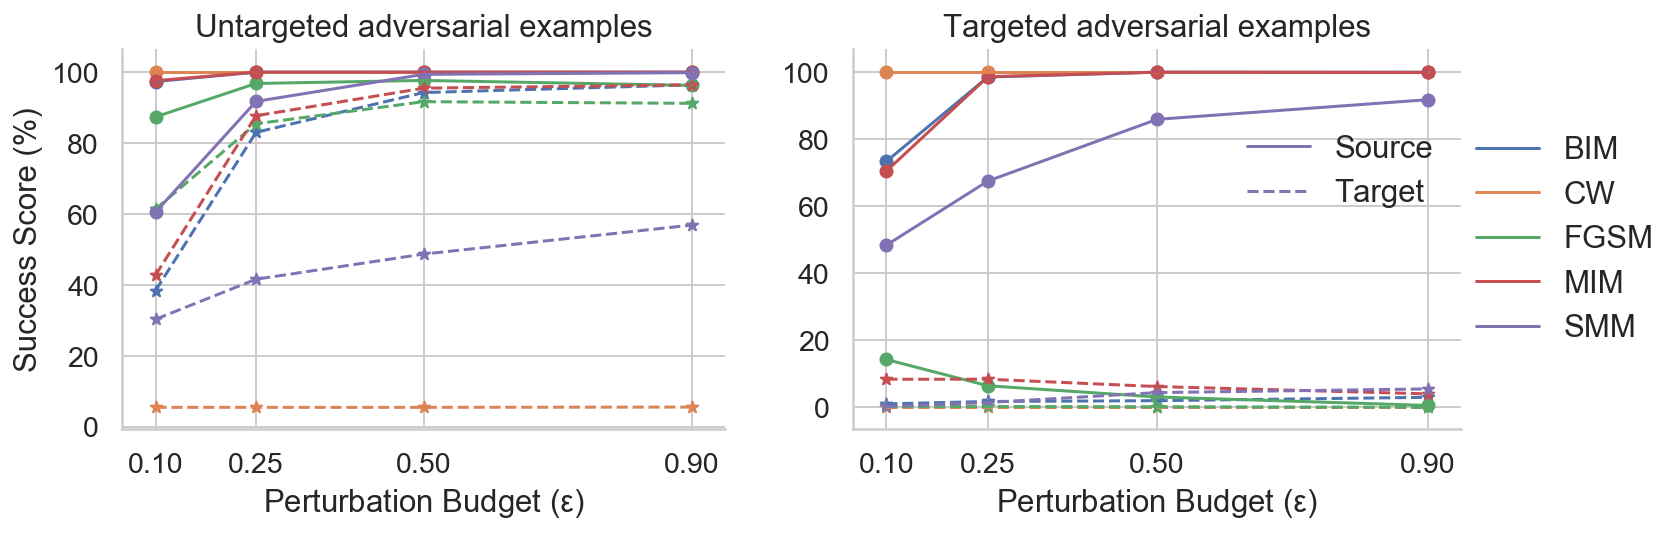

In [52]:
plot_untargeted_targeted_success_score(uci_source_untar_results, uci_source_tar_results,
                                      uci_target_untar_results, uci_target_tar_results, 
                                      "uci_trans_across_subjects")

# MHEALTH 

In [17]:
my_two_model = TWA.TwoModel("../Processed data/mHealth_wrist_source_dataset.pickle", 
                       "../Processed data/mHealth_wrist_target_dataset.pickle", [11], save_results=True)

Loading Source Dataset
[ 1  6  7  9 10]
Excluding class 11
X: (2464, 128, 3)
Y: (2464,)
Loading Target Dataset
[2, 3, 4, 5, 8]
Excluding class 11
X: (2527, 128, 3)
Y: (2527,)


In [18]:
my_two_model.prepare_for_training(batch_size=32, learning_rate=0.001, n_epochs=100)

Source
Training set (1663, 128, 3) 
Test set (616, 128, 3)
Validation set (185, 128, 3)
Target
Training set (1705, 128, 3) 
Test set (632, 128, 3)
Validation set (190, 128, 3)


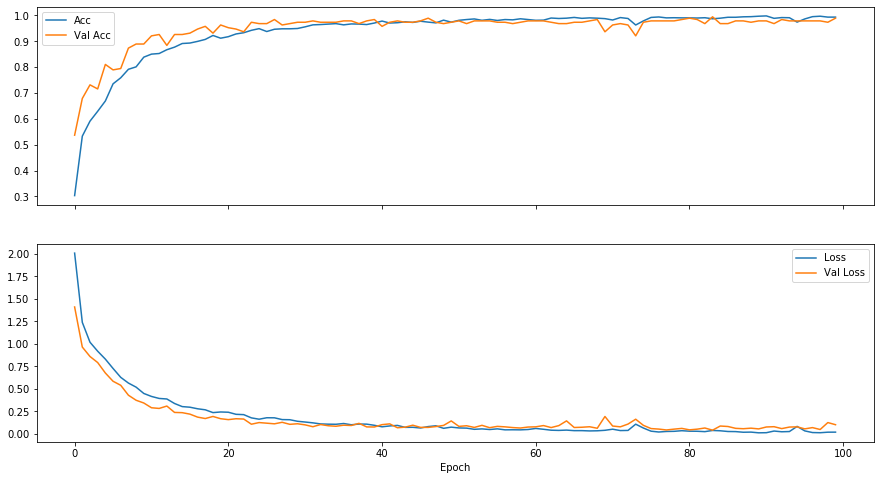

Saving trained source and target models
Source model path: ../Saved Model/mh_source_model
Target model path: ../Saved Model/mh_target_model
Performance of the source model mh_source_model
2464/2464 [==============================] - 0s 78us/sample - loss: 0.0182 - acc: 0.9951
On Source Dataset Loss: 0.018, Accuracy 99.513
2527/2527 [==============================] - 0s 74us/sample - loss: 4.1380 - acc: 0.6739
On Target Dataset Loss: 4.138, Accuracy 67.392
Performance of the target model mh_target_model
2464/2464 [==============================] - 0s 78us/sample - loss: 1.4958 - acc: 0.8283
On Source Dataset Loss: 1.496, Accuracy 82.833
2527/2527 [==============================] - 0s 61us/sample - loss: 0.0243 - acc: 0.9929
On Target Dataset Loss: 0.024, Accuracy 99.288


In [19]:
my_two_model.train_models("mh_source_model", "mh_target_model")

In [20]:
my_two_model.adversarial_init(epsilon, min_value, max_value, n_iterations, target_class)

In [21]:
my_two_model.adversarial_untargeted_attacks("mh_source_untar_results", "mh_target_untar_results")

C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\attacks_tf.py:27: UserWarning: attacks_tf is deprecated and will be removed on 2019-07-18 or after. Code should import functions from their new locations directly.
  warnings.warn("attacks_tf is deprecated and will be removed on 2019-07-18"
[INFO 2020-11-08 15:38:40,536 cleverhans] Constructing new graph for attack FastGradientMethod



Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
dim is deprecated, use axis instead


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001CE4372D828> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-08 15:38:40,844 cleverhans] Constructing new graph for a

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001CE4372D828> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001CE4372D828> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


616/616 [==============================] - 0s 68us/sample - loss: 2.3498 - acc: 0.7029


[INFO 2020-11-08 15:45:44,504 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001CE4372D828> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

616/616 [==============================] - 0s 67us/sample - loss: 2.3600 - acc: 0.6981


[INFO 2020-11-08 15:52:47,546 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001CE4372D828> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

616/616 [==============================] - 0s 73us/sample - loss: 2.4002 - acc: 0.6948


[INFO 2020-11-08 16:00:19,209 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001CE4372D828> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

616/616 [==============================] - 0s 78us/sample - loss: 2.4473 - acc: 0.6851
Saving the results of untargeted attacks.
Source model results at ../Results/texts/mh_source_untar_results.csv
Source model results at ../Results/texts/mh_target_untar_results.csv


In [22]:
my_two_model.adversarial_targeted_attacks("mh_source_tar_results", "mh_target_tar_results")

[INFO 2020-11-08 16:14:52,273 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-08 16:14:52,752 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

616/616 [==============================] - 0s 84us/sample - loss: 16.4147 - acc: 0.1932


[INFO 2020-11-08 16:24:13,331 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-08 16:24:13,873 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

616/616 [==============================] - 0s 89us/sample - loss: 16.3835 - acc: 0.1948


[INFO 2020-11-08 16:34:10,234 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-08 16:34:10,859 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

616/616 [==============================] - ETA: 0s - loss: 16.2377 - acc: 0.19 - 0s 110us/sample - loss: 16.1920 - acc: 0.1932


[INFO 2020-11-08 16:44:13,901 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-08 16:44:14,564 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001CE437288B8> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

616/616 [==============================] - 0s 153us/sample - loss: 15.9885 - acc: 0.1964
Saving the results of targeted attacks.
Source model results at ../Results/texts/mh_source_tar_results.csv
Source model results at ../Results/texts/mh_target_tar_results.csv


In [41]:
mh_source_tar_results = pd.read_csv(data_result_path+"mh_source_tar_results.csv")
mh_target_tar_results = pd.read_csv(data_result_path+"mh_target_tar_results.csv")

In [42]:
mh_source_untar_results = pd.read_csv(data_result_path+"mh_source_untar_results.csv")
mh_target_untar_results = pd.read_csv(data_result_path+"mh_target_untar_results.csv")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

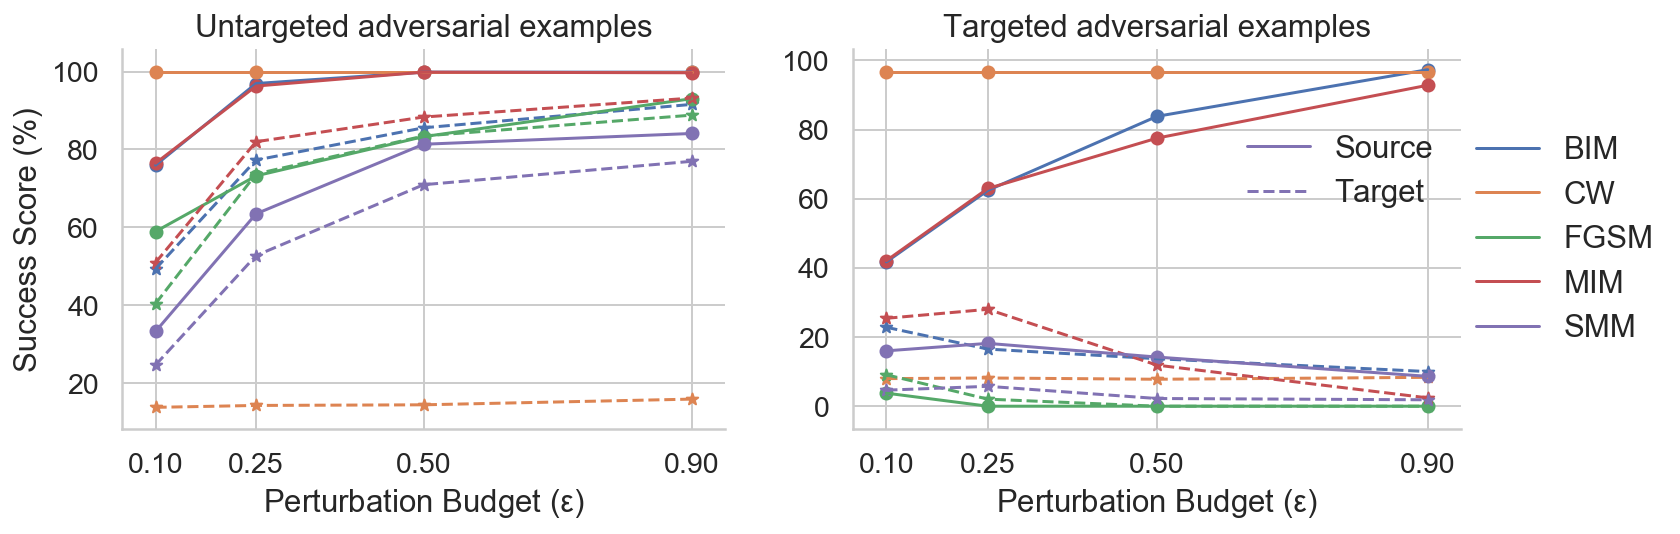

In [53]:
plot_untargeted_targeted_success_score(mh_source_untar_results, mh_source_tar_results,
                                      mh_target_untar_results, mh_target_tar_results, 
                                      "mh_trans_across_subjects")